In [1]:
from scipy.optimize import rosen
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume.pylab as plt3d

## 2-dimension

In [2]:
x, y = sympy.symbols("x, y")
f = rosen([x, y])
f

In [3]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = rosen([X, Y])

plt3d.plot_surface(X, Z, Y, color='green')
plt3d.ylabel("z")
plt3d.zlabel("y")
plt3d.show()

### Second Derivate Test

In [36]:
f_mat = sympy.Matrix([rosen([x, y])])
f_jaco = f_mat.jacobian([x, y])
f_jaco

⎡                         1.0                                      1.0⎤
⎢         1.0 ⎛   2.0    ⎞                  1.0        ⎛   2.0    ⎞   ⎥
⎣- 400.0⋅x   ⋅⎝- x    + y⎠    - 2.0⋅(-x + 1)     200.0⋅⎝- x    + y⎠   ⎦

In [37]:
f_hess = f_jaco.jacobian([x, y])
f_hess

⎡                               1.0                   ⎤
⎢       2.0         ⎛   2.0    ⎞                   1.0⎥
⎢800.0⋅x    - 400.0⋅⎝- x    + y⎠    + 2.0  -400.0⋅x   ⎥
⎢                                                     ⎥
⎢                      1.0                            ⎥
⎣              -400.0⋅x                       200.0   ⎦

In [38]:
sympy.solve(f_jaco, [x, y])

In [39]:
f_hess.subs({x: 1.0, y: 1.0}).det()

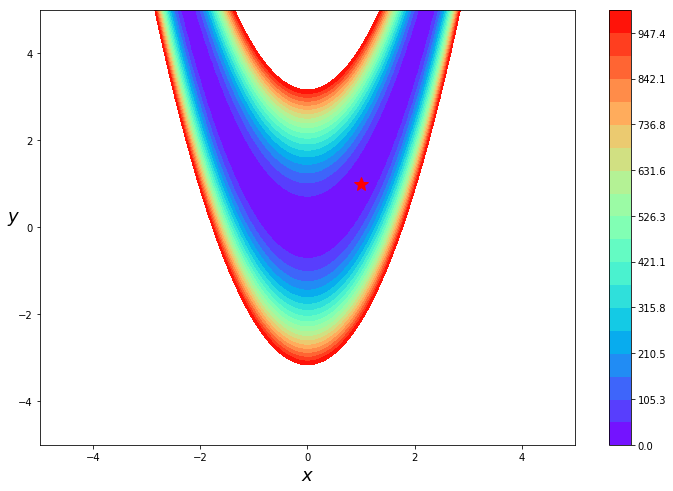

In [10]:
fig = plt.figure(figsize=(12, 8))  
plt.contourf(X, Y , Z, cmap='rainbow', levels=np.linspace(0,1000,20))
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(1, 1, 'r*', markersize=15)
plt.colorbar()
plt.show()  

In [4]:
plt3d.figure()
plt3d.plot_surface(X, Z, Y, color='green')
plt3d.scatter(np.array([1.]), np.array([0.]), np.array([1.]), 
              color='red', size=3)
plt3d.ylabel("z")
plt3d.zlabel("y")
plt3d.show()

In [15]:
def multivariate_unconstrained_opt(f, num_var=2):
    powell = optimize.minimize(f, np.zeros(num_var), method='Powell')
    bfgs = optimize.minimize(f, np.zeros(num_var), method='BFGS')
    cg = optimize.minimize(f, np.zeros(num_var), method='CG')
    print("Powell Method: \n", powell)
    print("\n")
    print("BFGS Method: \n", bfgs)
    print("\n")
    print("CG: \n", cg)

In [16]:
multivariate_unconstrained_opt(rosen, 2)

Powell Method: 
    direc: array([[1.54785007e-02, 3.24539372e-02],
       [1.33646191e-06, 2.53924992e-06]])
     fun: 1.9721522630525295e-31
 message: 'Optimization terminated successfully.'
    nfev: 462
     nit: 16
  status: 0
 success: True
       x: array([1., 1.])


BFGS Method: 
       fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


CG: 
      fun: 2.0085382242752512e-11
     jac: array([ 5.41245606e-06, -2.70523446e-06])
 message: 'Optimization terminated successfully.'
    nfev: 220
     nit: 21
    njev: 55
  status: 0
 success: True
       x: array([0.99999552, 0.99999103])


### Higher Dimension

In [17]:
x1, x2, x3 = sympy.symbols("x1, x2, x3")
rosen([x1, x2, x3])

In [18]:
multivariate_unconstrained_opt(rosen, 3)

Powell Method: 
    direc: array([[0.03241171, 0.06347088, 0.12256335],
       [0.13828641, 0.03046365, 0.00108163],
       [0.00105731, 0.00224122, 0.00491281]])
     fun: 8.317348889829529e-23
 message: 'Optimization terminated successfully.'
    nfev: 970
     nit: 26
  status: 0
 success: True
       x: array([1., 1., 1.])


BFGS Method: 
       fun: 3.619334334395138e-11
 hess_inv: array([[0.10001073, 0.19854122, 0.39688023],
       [0.19854122, 0.39898794, 0.79771538],
       [0.39688023, 0.79771538, 1.59984657]])
      jac: array([ 5.71834210e-06, -3.96671783e-06,  5.45957990e-07])
  message: 'Optimization terminated successfully.'
     nfev: 185
      nit: 28
     njev: 37
   status: 0
  success: True
        x: array([0.99999732, 0.99999462, 0.99998923])


CG: 
      fun: 3.037595488781694e-12
     jac: array([1.27747856e-06, 2.19235556e-06, 3.35733286e-06])
 message: 'Optimization terminated successfully.'
    nfev: 320
     nit: 32
    njev: 64
  status: 0
 success: True
   

In [21]:
from scipy import optimize

%time optimize.basinhopping(rosen, np.zeros(8))

Wall time: 4.53 s


                        fun: 7.288809768986649e-12
 lowest_optimization_result:       fun: 7.288809768986649e-12
 hess_inv: array([[1.69831955e-03, 9.75733296e-04, 7.27408624e-04, 8.54834089e-04,
        1.41531715e-03, 2.71012916e-03, 5.34891839e-03, 1.06845213e-02],
       [9.75733296e-04, 1.99581383e-03, 1.47693859e-03, 1.69417597e-03,
        2.78534600e-03, 5.30475978e-03, 1.04727589e-02, 2.09370061e-02],
       [7.27408624e-04, 1.47693859e-03, 2.99764848e-03, 3.47058383e-03,
        5.71038449e-03, 1.08655202e-02, 2.14807881e-02, 4.29154159e-02],
       [8.54834089e-04, 1.69417597e-03, 3.47058383e-03, 6.95305427e-03,
        1.14555134e-02, 2.18010988e-02, 4.30107521e-02, 8.59188544e-02],
       [1.41531715e-03, 2.78534600e-03, 5.71038449e-03, 1.14555134e-02,
        2.29555832e-02, 4.36872040e-02, 8.61603282e-02, 1.72120200e-01],
       [2.71012916e-03, 5.30475978e-03, 1.08655202e-02, 2.18010988e-02,
        4.36872040e-02, 8.78840515e-02, 1.73332842e-01, 3.46278140e-01],
      

In [22]:
multivariate_unconstrained_opt(rosen, 8)

Powell Method: 
    direc: array([[ 2.93233448e-10,  2.52418358e-10,  6.14290700e-11,
         1.50653312e-10,  4.70983592e-10,  1.11069779e-09,
         2.32236376e-09,  5.04710475e-09],
       [-5.00534870e-06,  1.22964010e-06,  9.70968907e-07,
        -7.54087646e-07, -1.44660188e-06, -1.99891499e-06,
        -2.97564494e-06, -5.47288294e-06],
       [-3.67449102e-06, -7.57340794e-06,  5.42494608e-06,
         6.00507324e-06,  3.10385448e-06,  1.91451653e-05,
         4.84500223e-05,  9.78242001e-05],
       [ 2.80794910e-08,  9.38679235e-09,  4.77294201e-08,
        -9.43165432e-08, -1.66176142e-07, -3.25655609e-07,
        -6.49734801e-07, -1.25750392e-06],
       [ 5.96361785e-02,  8.37965567e-02,  1.28974007e-01,
         1.70869372e-01,  1.00000499e-01,  1.59225318e-02,
         1.01568758e-03,  2.25082158e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       